In [112]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from matplotlib.patches import Ellipse

In [2]:
plt.rc('xtick', labelsize=8)
plt.rc('ytick', labelsize=8)
plt.rc('axes', labelsize=8)

In [3]:
resolution = 10

In [29]:
def k_reward(x,k=0.95):
    x = (x-0.1)/0.9
    y = (x-k*x)/(k-2*k*np.abs(x)+1)
    reward = 1-y
    return reward

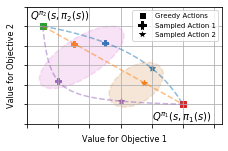

In [168]:
single_column_figure_width = 3.487
double_column_figure_width = 7

fig_width = single_column_figure_width
fig_height = fig_width / 1.618

fig, axs = plt.subplots(nrows=1,
                        ncols=1,
                        figsize=[fig_width,fig_height], # in inches
                        sharey=True)
plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=.05, hspace=.05)

axs.set_xlabel("Value for Objective 1")
axs.set_ylabel("Value for Objective 2")
axs.set_ylim([-0.25,1.25])
axs.set_xlim([0,1.25])

axs.set_xticklabels([])
axs.set_yticklabels([])

col = ["tab:blue","tab:orange","tab:purple"]
markerlist = ['P','*','v']

conformity = np.linspace(0.1,1,100)
i=0
for k in [0.5, 0, -0.9]:
    r = k_reward(conformity,k)
    axs.plot(conformity,r, linestyle='--', alpha=0.5, color=col[i])
    i+=1
    
pareto_points_x = [0.1, 1.0]
pareto_points_y = [1.0, 0.0]
axs.scatter(pareto_points_x[0], pareto_points_y[0], marker='s', color="tab:green")
axs.scatter(pareto_points_x[1], pareto_points_y[1], marker='s', color="tab:red")

intrp_points_x1 = np.array([0.5, 0.8])
intrp_points_x2 = np.array([0.3, 0.75])
intrp_points_x3 = np.array([0.2, 0.6])

intrp_points_y1 = k_reward(intrp_points_x1,k=0.5)
intrp_points_y2 = k_reward(intrp_points_x2,k=0.0)
intrp_points_y3 = k_reward(intrp_points_x3,k=-0.9)


for i in range(2):
    axs.scatter(intrp_points_x1[i], intrp_points_y1[i],  color=col[0],  marker=markerlist[i])
    axs.scatter(intrp_points_x2[i], intrp_points_y2[i],  color=col[1],  marker=markerlist[i])
    axs.scatter(intrp_points_x3[i], intrp_points_y3[i],  color=col[2],  marker=markerlist[i])

axs.text(0.02,1.1,r'$Q^{\pi_2}(s, \pi_2(s))$')
axs.text(0.8,-0.2,r'$Q^{\pi_1}(s, \pi_1(s))$')

legend_elements = [Line2D([0], [0], marker='s', 
                          color='w', label='Greedy Actions', 
                          markerfacecolor='k', markersize=7),
                  Line2D([0], [0], marker=markerlist[0], 
                          color='w', label='Sampled Action 1', 
                          markerfacecolor='k', markersize=10),
                  Line2D([0], [0], marker=markerlist[1], 
                          color='w', label='Sampled Action 2', 
                          markerfacecolor='k', markersize=10)]


ellipse1 = Ellipse(xy=(0.35,0.6), width=0.9, height=0.35, angle=60, alpha=0.2,
                        edgecolor=u'orchid', fc=u'orchid', lw=1.5,linestyle='--', )

ellipse2 = Ellipse(xy=(0.7,0.25), width=0.6, height=0.3, angle=70, alpha=0.2,
                        edgecolor=u'peru', fc=u'peru', lw=1.5,linestyle='--', )
axs.add_patch(ellipse1)
axs.add_patch(ellipse2)

axs.legend(handles=legend_elements,
          fontsize='x-small')
axs.grid()
fig.savefig('./figures/morl_inference.png', dpi=300, bbox_inches='tight', transparent=True)